<a href="https://colab.research.google.com/github/Loi-Mattia/infoPython/blob/main/geopandasEx4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# caricare il geodataframe delle piste ciclabili bike_ciclabili.zip

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 36.7 MB/s 
     |████████████████████████████████| 15.4 MB 42.1 MB/s 


In [5]:
%matplotlib inline

import pandas as pd
import geopandas

In [6]:
bikes = geopandas.read_file("/content/drive/MyDrive/bike_ciclabili")
bikes

id_amat  ...                                           geometry
0        9001  ...  LINESTRING (9.18700 45.48095, 9.18696 45.48085...
1        9002  ...  LINESTRING (9.24192 45.43931, 9.24202 45.43939...
2        9003  ...  LINESTRING (9.23979 45.43996, 9.23991 45.43998...
3        9004  ...    LINESTRING (9.23902 45.44251, 9.23898 45.44256)
4        9005  ...  LINESTRING (9.23990 45.43999, 9.23985 45.44009...
...       ...  ...                                                ...
3160    12932  ...    LINESTRING (9.14977 45.46021, 9.14979 45.46024)
3161    12933  ...    LINESTRING (9.14966 45.46050, 9.14972 45.46057)
3162    12934  ...    LINESTRING (9.14963 45.46046, 9.14966 45.46050)
3163    12935  ...    LINESTRING (9.14957 45.46039, 9.14963 45.46046)
3164    12936  ...    LINESTRING (9.14954 45.46035, 9.14957 45.46039)

[3165 rows x 11 columns]

In [7]:
# visualizzare il geodataframe

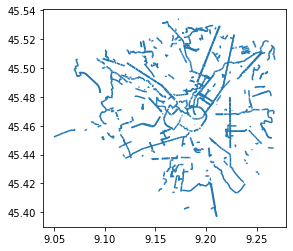

In [8]:
bikes.plot()

In [9]:
# caricare il geodataframe dei quartieri ds964_nil_wm.zip

In [10]:
quart=geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm")
quart

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [11]:
# visualizza la mappa dei quartieri e delle piste ciclabili

In [12]:
pip install contextily

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [13]:
import contextily
import matplotlib.pyplot as plt

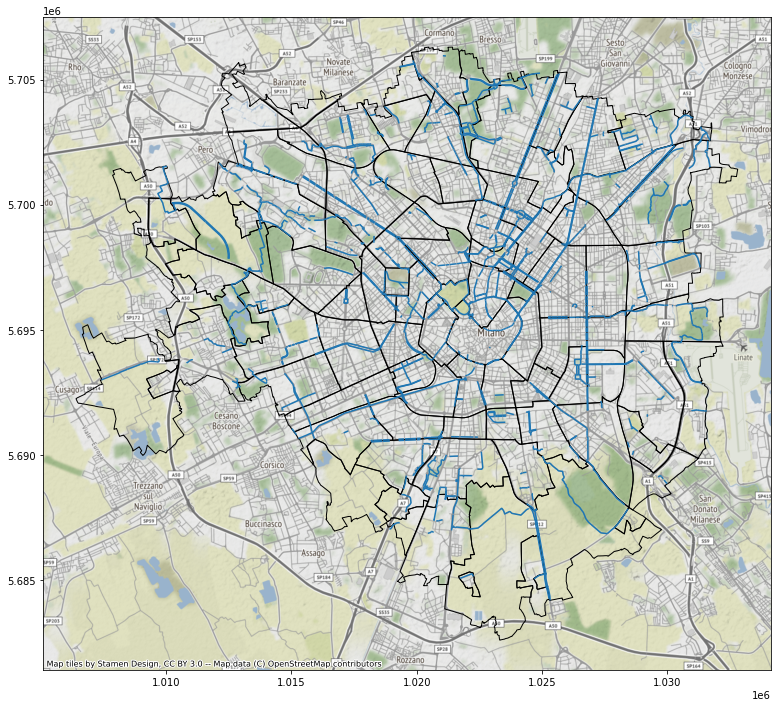

In [14]:

ax= quart.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="none",edgecolor="k")
bikes.to_crs(epsg=3857).plot(ax=ax)
contextily.add_basemap(ax)

In [15]:
# creare una geoserie con le informazioni sulla ciclabile di via Melchiorre Gioia e visualizzarla

In [16]:
mGioia=bikes[bikes.anagrafica=="VIA MELCHIORRE GIOIA"]
mGioia

id_amat  ...                                           geometry
213      9259  ...  LINESTRING (9.19121 45.48112, 9.19123 45.48113...
266      9313  ...  LINESTRING (9.19590 45.48496, 9.19589 45.48493...
292      9340  ...  LINESTRING (9.19814 45.48687, 9.19811 45.48684...
295      9343  ...  LINESTRING (9.20092 45.48961, 9.20073 45.48945...
296      9344  ...  LINESTRING (9.20406 45.49191, 9.20403 45.49187...
...       ...  ...                                                ...
1659    11018  ...  LINESTRING (9.19558 45.48514, 9.19533 45.48493...
1664    11024  ...  LINESTRING (9.19854 45.48762, 9.19849 45.48761...
1680    11055  ...    LINESTRING (9.19585 45.48416, 9.19589 45.48440)
1738    11159  ...    LINESTRING (9.19289 45.48287, 9.19283 45.48286)
1793    11330  ...    LINESTRING (9.19076 45.48075, 9.19121 45.48112)

[69 rows x 11 columns]

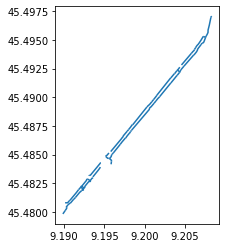

In [17]:
mGioia.plot()

In [18]:
# trovare tutti i quartieri attraversati da questa pista ciclabile

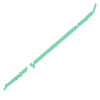

In [19]:
gioia_union=mGioia.unary_union
gioia_union

In [20]:
gioiaIntersect=quart[quart.intersects(gioia_union, align=True)]
gioiaIntersect

ID_NIL  ...                                           geometry
8       11  ...  POLYGON ((9.20116 45.48963, 9.20086 45.48938, ...
17      13  ...  POLYGON ((9.21220 45.50971, 9.21224 45.50922, ...
56      12  ...  POLYGON ((9.18489 45.50554, 9.18724 45.50518, ...
68       9  ...  POLYGON ((9.19871 45.48484, 9.19836 45.48389, ...
72      10  ...  POLYGON ((9.21836 45.49970, 9.21877 45.49951, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...

[6 rows x 9 columns]

In [21]:
# visualizzare su una mappa la pista ciclabile e i quartieri attraversati (utilizzare i colori presenti nell'esempio)

In [22]:
gioiaIntersect.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
bikes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

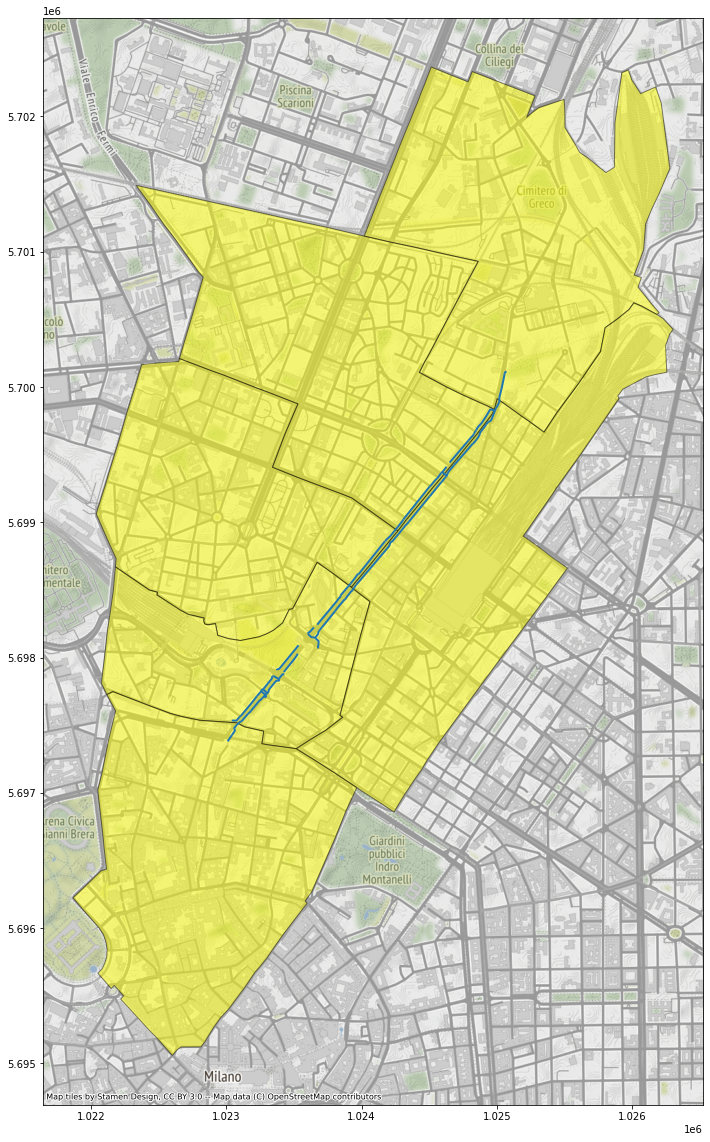

In [24]:
ax= gioiaIntersect.to_crs(epsg=3857).plot(figsize=(24,20),facecolor="yellow",edgecolor="k",alpha=0.5)
mGioia.to_crs(epsg=3857).plot(ax=ax,linewidth=2)
contextily.add_basemap(ax)

In [25]:
# caricare il geodataframe delle fontanelle Fontanelle.zip

In [26]:
fontanelle = geopandas.read_file("/content/drive/MyDrive/Fontanelle")
fontanelle

Fonte  ...                            geometry
0   © OpenStreetMap contributors - OSM  ...  POINT Z (9.16165 45.47091 0.00000)
1   © OpenStreetMap contributors - OSM  ...  POINT Z (9.23184 45.46831 0.00000)
2   © OpenStreetMap contributors - OSM  ...  POINT Z (9.14380 45.48017 0.00000)
3   © OpenStreetMap contributors - OSM  ...  POINT Z (9.14401 45.48319 0.00000)
4   © OpenStreetMap contributors - OSM  ...  POINT Z (9.11746 45.49320 0.00000)
..                                 ...  ...                                 ...
77  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22943 45.47751 0.00000)
78  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22730 45.47965 0.00000)
79  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22773 45.47728 0.00000)
80  © OpenStreetMap contributors - OSM  ...  POINT Z (9.22815 45.47994 0.00000)
81  © OpenStreetMap contributors - OSM  ...  POINT Z (9.15540 45.47531 0.00000)

[82 rows x 3 columns]

In [27]:
# visualizzare il geodataframe su una mappa

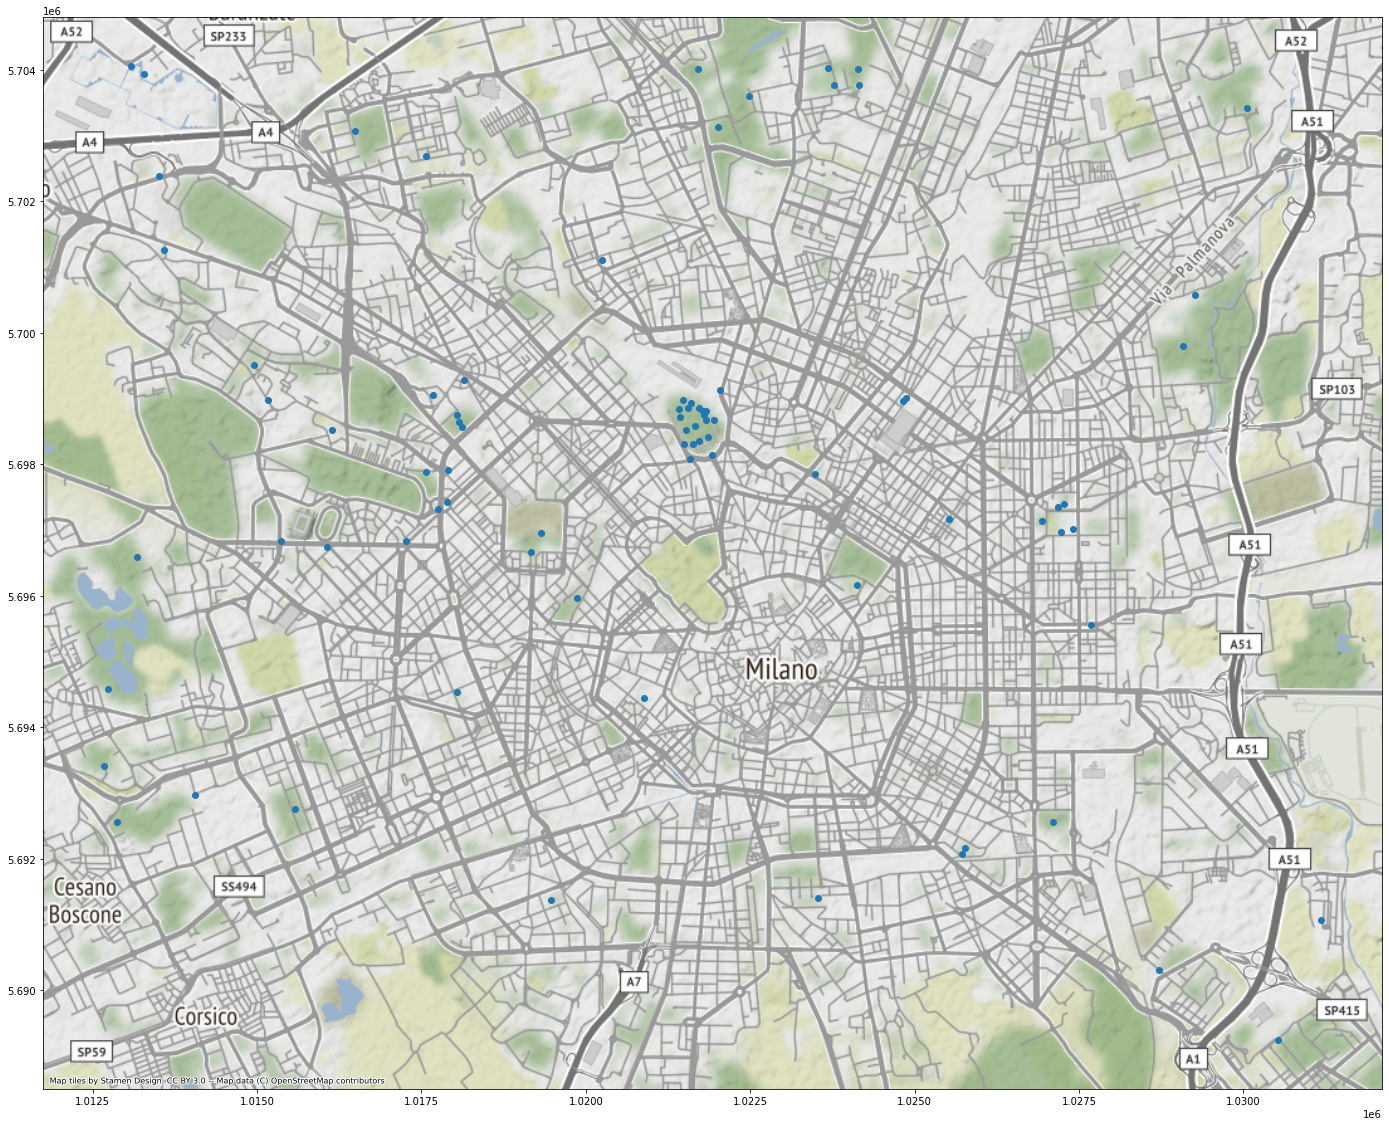

In [28]:
ax= fontanelle.to_crs(epsg=3857).plot(figsize=(24,20))

contextily.add_basemap(ax)

In [29]:
# visualizzare su una mappa le fontanelle e i quartieri in cui si trovano.
# non visualizzare i quartieri in cui non ci sono fontanelle

In [32]:
quartFont=fontanelle.geometry.squeeze()
quartFont

0     POINT Z (9.16165 45.47091 0.00000)
1     POINT Z (9.23184 45.46831 0.00000)
2     POINT Z (9.14380 45.48017 0.00000)
3     POINT Z (9.14401 45.48319 0.00000)
4     POINT Z (9.11746 45.49320 0.00000)
                     ...                
77    POINT Z (9.22943 45.47751 0.00000)
78    POINT Z (9.22730 45.47965 0.00000)
79    POINT Z (9.22773 45.47728 0.00000)
80    POINT Z (9.22815 45.47994 0.00000)
81    POINT Z (9.15540 45.47531 0.00000)
Name: geometry, Length: 82, dtype: geometry

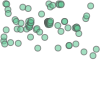

In [33]:
quartFontUnion=quartFont.unary_union
quartFontUnion

In [34]:
quartFontWithin=quart[quart.intersects(quartFontUnion)]
quartFontWithin

ID_NIL  ...                                           geometry
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
7       76  ...  POLYGON ((9.13481 45.52095, 9.13481 45.52094, ...
10      60  ...  POLYGON ((9.13020 45.48464, 9.13075 45.48449, ...
13       4  ...  POLYGON ((9.20700 45.46787, 9.20712 45.46721, ...
18      58  ...  POLYGON ((9.15164 45.48045, 9.15161 45.47983, ...
19      78  ...  POLYGON ((9.17234 45.49665, 9.17328 45.49670, ...
20      83  ...  POLYGON ((9.17808 45.53479, 9.17807 45.53439, ...
21      66  ...  POLYGON ((9.14479 45.48565, 9.14447 45.48546, ...
27      71  ...  POLYGON ((9.16204 45.49690, 9.16012 45.49570, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
30      14  ...  POLYGON ((9.21337 45.52948, 9.21337 45.52948, ...
35      59  ...  POLYGON ((9.16028 45.48030, 9.16022 45.48005, ...
37      37  ...  POLYGON ((9.20060 45.43608, 9.20026 45.43606, ...
40      29  ...  POLYGON ((9.23747 45.45782, 9.23740 45.45627, ...
44      28  ...  POLYGON ((9.22392 45.45969, 9.22392 45.45934, ...
47      65  ...  POLYGON ((9.09884 45.50652, 9.09884 45.50651, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
52      56  ...  POLYGON ((9.12613 45.46928, 9.12638 45.46851, ...
57      52  ...  POLYGON ((9.12727 45.46894, 9.12874 45.46840, ...
63      18  ...  POLYGON ((9.26860 45.51035, 9.26874 45.51034, ...
65      55  ...  POLYGON ((9.09315 45.46938, 9.09393 45.46802, ...
68       9  ...  POLYGON ((9.19871 45.48484, 9.19836 45.48389, ...
70      21  ...  POLYGON ((9.22356 45.48603, 9.22358 45.48423, ...
71      45  ...  POLYGON ((9.15497 45.44806, 9.15574 45.44793, ...
72      10  ...  POLYGON ((9.21836 45.49970, 9.21877 45.49951, ...
73      77  ...  POLYGON ((9.15849 45.50959, 9.15948 45.50945, ...
74      72  ...  POLYGON ((9.13016 45.50784, 9.13038 45.50686, ...
76      22  ...  POLYGON ((9.23797 45.46971, 9.23671 45.46966, ...
79       7  ...  POLYGON ((9.17538 45.46981, 9.17606 45.46932, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
81      69  ...  POLYGON ((9.18225 45.48679, 9.18201 45.48560, ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[35 rows x 9 columns]

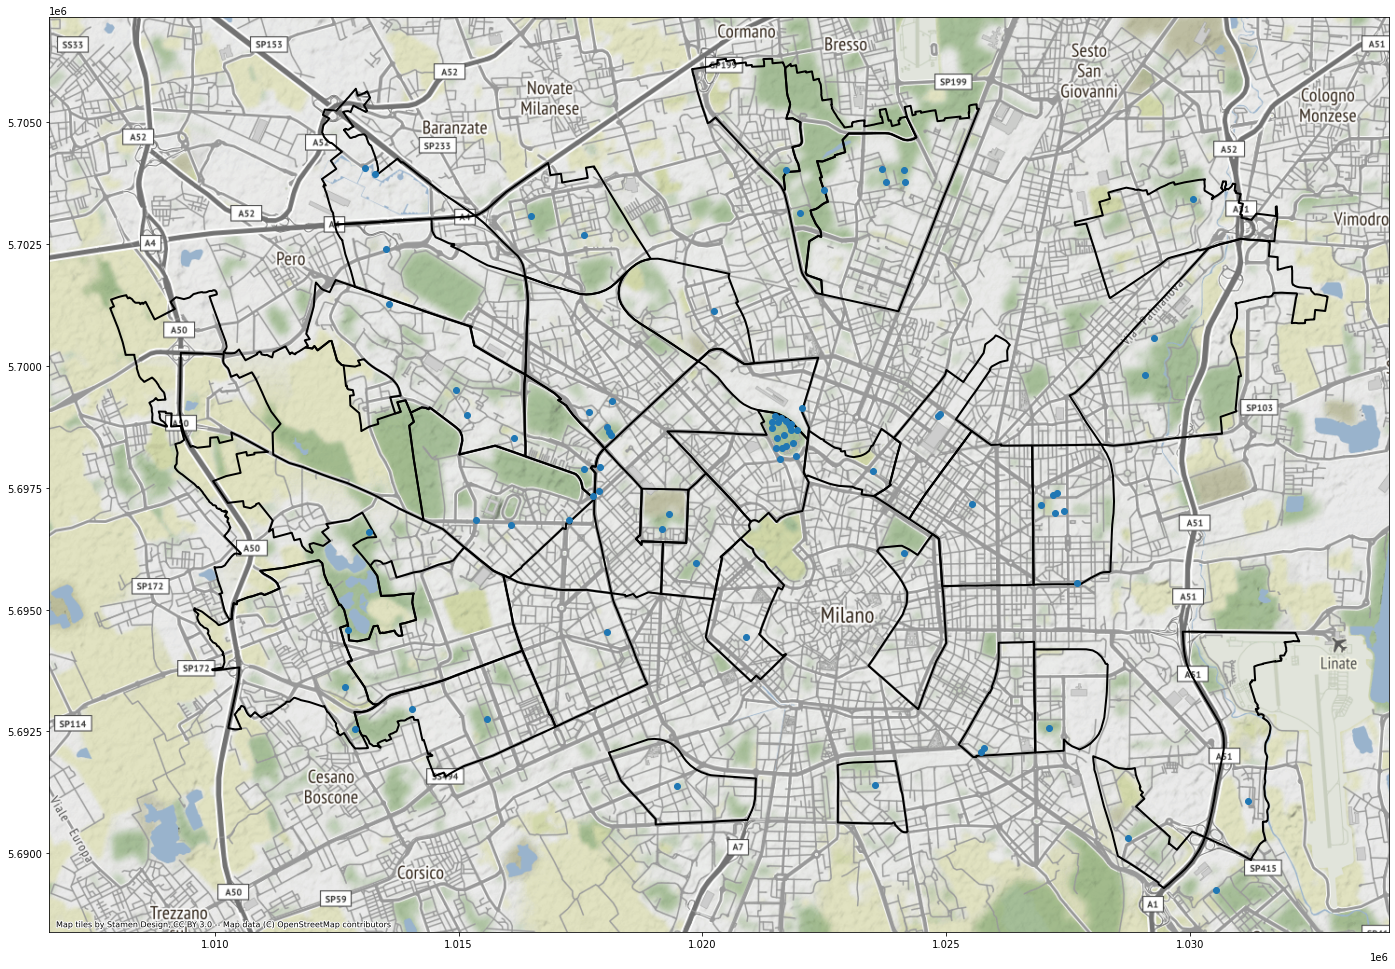

In [35]:
ax= quartFontWithin.to_crs(epsg=3857).plot(figsize=(24,20),facecolor="none",edgecolor="k",linewidth=2)
fontanelle.to_crs(epsg=3857).plot(ax=ax)
contextily.add_basemap(ax)

In [36]:
# colorare i quartieri in modo proporzionale al numero di fontanelle presenti (giallo molte fontanelle, blu scuro poche fontanelle)
# non evidenziare i quartieri senza fontanelle